In [1]:
###台灣各縣市導致刑事案件與竊盜案件可能因素
##資料來源:中華民國統計資訊網

In [2]:
###資料說明
#year:採用年數為2013年至2015年
#city:採用全台灣20個縣市的資料(金門縣與連江縣除外，因其縣市資料太過極端因此不採用)
#Criminal case(單位:每千件發生數)
#Burglary(單位:每千件發生數)
#unemployment rate(單位:%)
#tax(單位:每千萬)
#Income(單位:萬)
#population(單位:每十萬人)
#region(將台灣20個縣市劃分為四個區域)

In [3]:
import pandas as pd

Criminalcase= pd.read_csv("C:/Users/star0/Desktop/Criminal case.csv")
Criminalcase.shape

(100, 9)

In [4]:
Criminalcase.head()

,year,city,Criminal case,Burglary,unemployment rate,tax,Income,population,region
0,2013,New taipei,54.39,13.19,4.2,20.40,28.48,39.55,north
1,2014,New taipei,50.19,12.21,3.9,22.11,29.16,39.67,north
2,2015,New taipei,48.91,10.58,3.7,24.66,30.56,39.71,north
3,2016,New taipei,47.06,9.25,3.9,24.68,32.62,39.79,north
4,2017,New taipei,45.01,8.68,3.8,23.68,33.76,39.87,north


In [5]:
Criminalcase.tail()

,year,city,Criminal case,Burglary,unemployment rate,tax,Income,population,region
95,2013,Chiayi country,4.27,1.22,3.9,0.73,31.19,2.70,south
96,2014,Chiayi country,4.10,1.13,3.7,0.74,32.26,2.70,south
97,2015,Chiayi country,3.92,0.88,3.5,0.76,29.70,2.70,south
98,2016,Chiayi country,3.79,0.74,3.7,0.80,31.55,2.69,south
99,2017,Chiayi country,3.75,0.66,3.7,0.90,30.93,2.69,south


In [6]:
Criminalcase_2017 = Criminalcase[Criminalcase["year"] == 2017]
Criminalcase_2017.shape

(20, 9)

In [7]:
grouped =Criminalcase_2017.groupby("region")
country_counts_ser = grouped["region"].count().sort_values(ascending=False)

In [8]:
import matplotlib.pyplot as plt

In [9]:
#各區域有多少城市

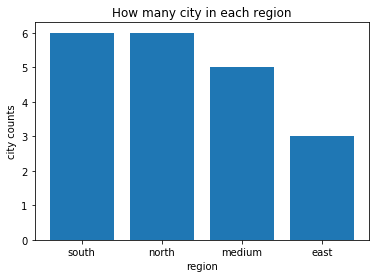

In [10]:
continent_cnts = len(country_counts_ser.values)
plt.bar(range(continent_cnts), country_counts_ser.values)
plt.xticks(range(continent_cnts), country_counts_ser.index)
plt.title("How many city in each region")
plt.xlabel("region")
plt.ylabel("city counts")
plt.show()

In [11]:
#各區域的竊盜數量

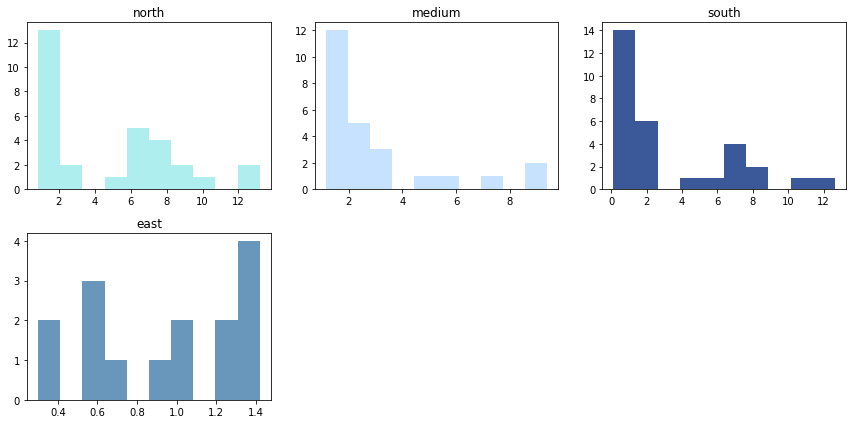

In [12]:
figure, axis = plt.subplots(2, 3, figsize=(12, 6))

row_indice = [0, 0, 0, 1, 1]
col_indice = [0, 1, 2, 0, 1]
continents = Criminalcase["region"].unique()
hist_colors = ["#afeeee", "#c6e2ff", "#3b5998", "#6897bb"]
for ridx, cidx, cont, col in zip(row_indice, col_indice, continents, hist_colors):
    subset_df = Criminalcase[Criminalcase["region"] == cont]
    axis[ridx, cidx].hist(subset_df["Burglary"], bins=10, color=col)
    axis[ridx, cidx].set_title(cont)
axis[1, 2].set_visible(False)
axis[1, 1].set_visible(False)
plt.tight_layout()
plt.show()

In [13]:
##各區域的竊盜案發生數與失業率的關係

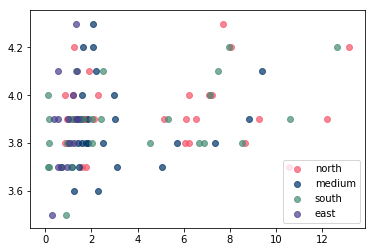

In [14]:
hex_colors = ["#f6546a", "#003366", "#458b74", "#483d8b"]
continents =Criminalcase["region"].unique()
for col, cont in zip(hex_colors, continents):
    subset_df =Criminalcase[Criminalcase["region"] == cont]
    plt.scatter(subset_df["Burglary"], subset_df["unemployment rate"], color=col, alpha=0.7, label=cont)

plt.legend()
plt.show()

In [15]:
#由上圖可看出竊盜案件和失業率的關係較無相關

In [16]:
#各區域竊盜數與每人每年可支配所得的關係

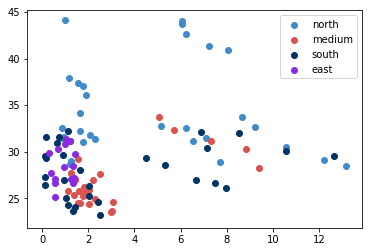

In [17]:
hex_colors = ["#428bca", "#d9534f", "#003366", "#8a2be2"]
continents =Criminalcase["region"].unique()
for col, cont in zip(hex_colors, continents):
    subset_df =Criminalcase[Criminalcase["region"] == cont]
    plt.scatter(subset_df["Burglary"], subset_df["Income"], color=col, alpha=1, label=cont)

plt.legend()
plt.show()

In [18]:
#由上圖可知東部的人均所的雖然較低但刑事案件也很低
#北部的人均所得雖然偏高，但是刑事案件數較高的也是偏在北部居多
#相關性較低

In [19]:
#各區域竊盜數與人口數的關係

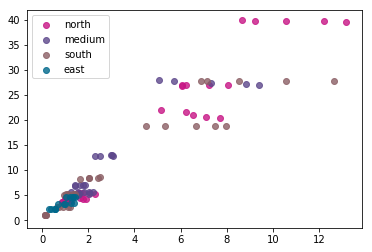

In [20]:
hex_colors = ["#c71585", "#5d478b", "#8b5f65", "#00688b"]
continents =Criminalcase["region"].unique()
for col, cont in zip(hex_colors, continents):
    subset_df =Criminalcase[Criminalcase["region"] == cont]
    plt.scatter(subset_df["Burglary"], subset_df["population"], color=col, alpha=0.8, label=cont)

plt.legend()
plt.show()

In [21]:
#由上圖可知竊盜數和人口數呈現正比

In [22]:
##各區域的刑事案件發生數與失業率的關係

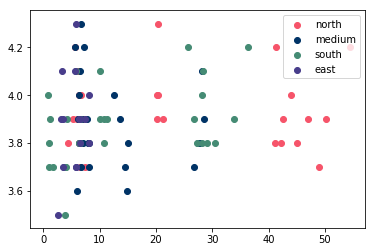

In [23]:
hex_colors =["#f6546a", "#003366", "#458b74", "#483d8b"]
continents =Criminalcase["region"].unique()
for col, cont in zip(hex_colors, continents):
    subset_df =Criminalcase[Criminalcase["region"] == cont]
    plt.scatter(subset_df["Criminal case"], subset_df["unemployment rate"], color=col, alpha=1, label=cont)

plt.legend()
plt.show()

In [24]:
#由上圖可知刑事案件與失業率得關係較無相關

In [25]:
#各區域竊盜案與每人每年可支配所得的關係

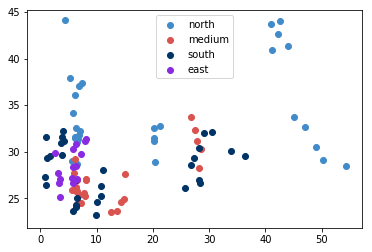

In [26]:
hex_colors = ["#428bca", "#d9534f", "#003366", "#8a2be2"]
continents =Criminalcase["region"].unique()
for col, cont in zip(hex_colors, continents):
    subset_df =Criminalcase[Criminalcase["region"] == cont]
    plt.scatter(subset_df["Criminal case"], subset_df["Income"], color=col, alpha=1, label=cont)

plt.legend()
plt.show()

In [27]:
#由上圖可知，刑事案件數和每人可支配所得呈現弱相關

In [28]:
#各區域刑事案件與人口數的關係

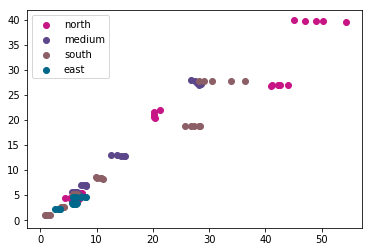

In [29]:
hex_colors =["#c71585", "#5d478b", "#8b5f65", "#00688b"]
continents =Criminalcase["region"].unique()
for col, cont in zip(hex_colors, continents):
    subset_df =Criminalcase[Criminalcase["region"] == cont]
    plt.scatter(subset_df["Criminal case"], subset_df["population"], color=col, alpha=1, label=cont)

plt.legend()
plt.show()

In [30]:
#由上圖可知刑事案件與人口數呈現正相關
#表示人口數越多的區域，刑事案件犯罪較高

In [34]:
#比較台北與澎湖的竊盜案件與人口數

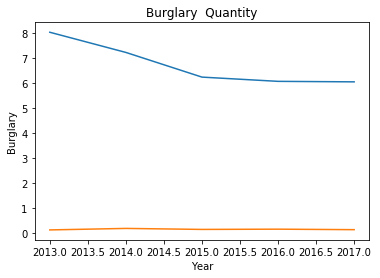

In [43]:
Taipei = Criminalcase[Criminalcase["city"] == "Taipei"]
plt.plot(Taipei["year"], Taipei["Burglary"])
Penghu = Criminalcase[Criminalcase["city"] == "Penghu"]
plt.plot(Penghu["year"], Penghu["Burglary"])
plt.xlabel("Year")
plt.ylabel("Burglary")
plt.title("Burglary  Quantity")
plt.show()

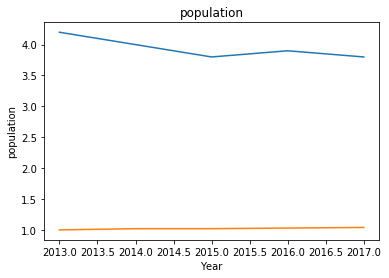

In [40]:
Taipei = Criminalcase[Criminalcase["city"] == "Taipei"]
plt.plot(Taipei["year"], Taipei["unemployment rate"])
Penghu = Criminalcase[Criminalcase["city"] == "Penghu"]
plt.plot(Penghu["year"], Penghu["population"])
plt.xlabel("Year")
plt.ylabel("population")
plt.title("population")
plt.show()

In [35]:
#由上兩個圖可以得知澎湖的人口數以及台北的人口數相差甚遠，且竊盜案件也差很多
#從台北的人口數以及竊盜案件來看可以發現人口數和竊盜案件呈現正相關，近年來的竊盜案件下降，人口數也是下降的。

In [45]:
#從台灣的四個區域中各挑選一個城市來比較竊盜案件與失業率的關係

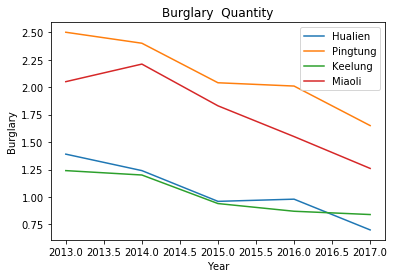

In [37]:
country_list = ["Hualien","Pingtung","Keelung","Miaoli"]
for city in country_list:
    subset_df = Criminalcase[Criminalcase["city"] == city]
    plt.plot(subset_df["year"], subset_df["Burglary"], label = city)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Burglary")
plt.title("Burglary  Quantity")
plt.show()

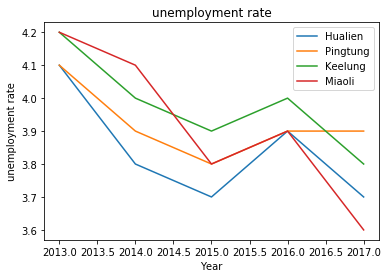

In [44]:
country_list = ["Hualien","Pingtung","Keelung","Miaoli"]
for city in country_list:
    subset_df = Criminalcase[Criminalcase["city"] == city]
    plt.plot(subset_df["year"], subset_df["unemployment rate"], label = city)
plt.legend()
plt.xlabel("Year")
plt.ylabel("unemployment rate")
plt.title("unemployment rate")
plt.show()

In [ ]:
#由上面兩個圖可以得知近年竊盜案件的數量有下降的趨勢，而失業率也是有下降的的趨勢
#有此可知失業率會影響竊盜案件的數量，但在前面4個區域一起比較的結果個別城市的比較明顯!